# MACHINE LEARNING: AIRBNB ANALYSIS



UoEO Machine Learning

Assignment Due Date: 2 December, 2024

## TEAM 2 AUTHORS
* Ahmed Husain
* Dinh (Danty) Khoi
* Maria Ingold
* Murthy Kanuri



## PROJECT DESCRIPTION

### Development Team Project

Determine interesting business analytic substantive question answered by dataset that is useful for the Airbnb executive board.

### Business Analytic Question

#### Agreed by: Ahmed, Danty, Maria, Murthy

What factors influence Airbnb listing prices in NYC, and how can Airbnb provide tailored pricing recommendations based on location, room type, and host characteristics?  

### Source Dataset: Airbnb NYC 2019

[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)    

### Code

[![Open In GitHub](https://img.shields.io/badge/Open%20In-GitHub-lightgrey?logo=github)](https://github.com/mariaingold/AirbnbNYC/blob/main/AirbnbNYC.ipynb)  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mariaingold/AirbnbNYC/blob/main/AirbnbNYC.ipynb)



## SETUP

### Import Libraries

In [1]:
import pandas as pd             # data manipulation
import numpy as np              # numerical computation

### Import Data

***Manually upload file into Session Storage in Google Colab***

### Read Data

In [3]:
airbnb = pd.read_csv("AB_NYC_2019.csv")

## BASIC DATA EXPLORATION

### Number of columns and rows

In [ ]:
print("Number of columns: ", len(airbnb.columns))

print("Number of rows: ", len(airbnb))

Number of columns:  16
Number of rows:  48895


### Column names and types

In [4]:
airbnb.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


### 5-Figure Summary per Column

In [5]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Review Sample Data (head and tail)

In [6]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## DATA CLEANING

### Find NULLs

### Column names, nulls and types (this one is more useful)

In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Number of nulls per field

In [ ]:
airbnb.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [9]:
#Average_price of property according to the location
avg_preffered_price_df = airbnb.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


## EXPLORATORY DATA ANALYSIS

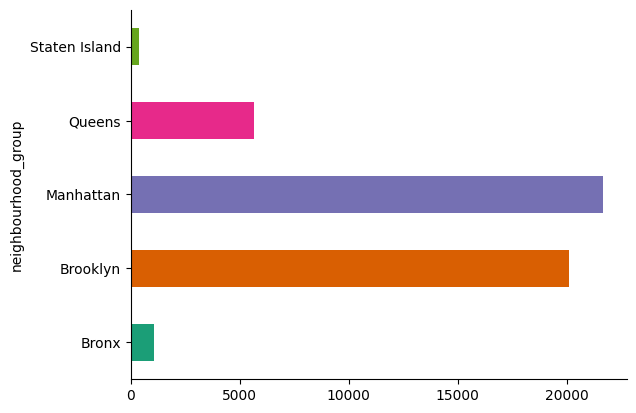

In [ ]:
# @title neighbourhood_group

from matplotlib import pyplot as plt
import seaborn as sns
airbnb.groupby('neighbourhood_group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

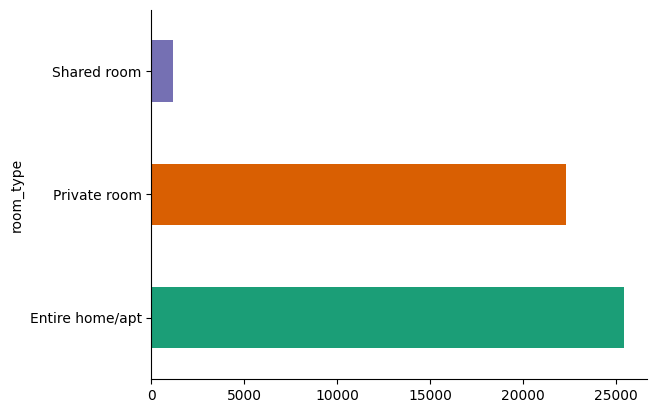

In [ ]:
# @title room_type

from matplotlib import pyplot as plt
import seaborn as sns
airbnb.groupby('room_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

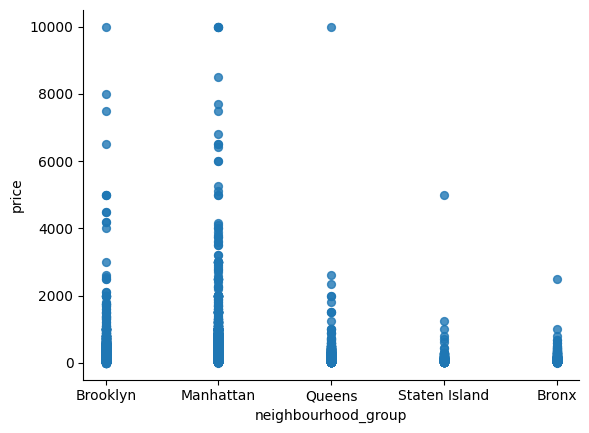

In [ ]:
# @title neighbourhood_group vs price

from matplotlib import pyplot as plt
airbnb.plot(kind='scatter', x='neighbourhood_group', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## INTERROGATE DATA

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

## CONCLUSION

## EDA



### EDA OVerall

The NYC Airbnb dataset has 48,895 entries and 16 columns. Key columns include:
- Location and Host Information: neighbourhood_group, neighbourhood, latitude, longitude, host_id, and host_name.
- Listing Characteristics: room_type, price, minimum_nights, number_of_reviews, last_review, and reviews_per_month.
- Listing Metrics: calculated_host_listings_count (number of listings by the host) and availability_365 (days available per year).

Some columns, such as name, host_name, and last_review, contain missing values. Specifically:
- name and host_name have a few missing entries.
- last_review and reviews_per_month have more substantial missing values, likely due to properties with no reviews.

EDA Plan for This Dataset

	1.	Identify Missing Values: Check and handle missing values.
	2.	Univariate Analysis: Examine distributions for numerical columns (e.g., price, minimum_nights).
	3.	Skewness and Kurtosis: Analyze these statistics for each numeric feature.
	4.	Correlation Heatmap: Generate a heatmap for numeric columns.
	5.	Categorical Analysis: Explore neighbourhood_group and room_type.
	6.	Geospatial Analysis: Visualize the distribution of listings across NYC on a map.

Let’s start with identifying and handling missing values

In [ ]:
import pandas as pd

# Load the new dataset for Airbnb NYC 2019 to get a sense of its structure and contents
nyc_airbnb_df = pd.read_csv("/content/AB_NYC_2019.csv")

# Display basic information about the dataset
nyc_airbnb_df.info(), nyc_airbnb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(None,
      id                                              name  host_id  \
 0  2539                Clean & quiet apt home by the park     2787   
 1  2595                             Skylit Midtown Castle     2845   
 2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
 3  3831                   Cozy Entire Floor of Brownstone     4869   
 4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
 
      host_name neighbourhood_group neighbourhood  latitude  longitude  \
 0         John            Brooklyn    Kensington  40.64749  -73.97237   
 1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
 2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
 3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
 4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
 
          room_type  price  minimum_nights  number_of_reviews last_review  \
 0     Private room    149               1

The dataset has missing values in the following columns:
- last_review: 10,052 missing entries
- reviews_per_month: 10,052 missing entries, likely corresponding to listings with no reviews.
- host_name: 21 missing entries
- name: 16 missing entries

I’ll handle these missing values as follows:
- last_review and reviews_per_month: Replace missing values with “No reviews” for last_review and 0 for reviews_per_month.
- host_name and name: Since these are non-essential for analysis, we can leave them as-is or remove rows if needed for specific tasks.

Let’s implement this cleaning step.

In [ ]:
# Step 1: Identify missing values in the dataset
missing_values = nyc_airbnb_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

,0
reviews_per_month,10052
last_review,10052
host_name,21
name,16


After handling the missing values, only name and host_name still have a few missing entries. Since these columns are not critical for the EDA, we can proceed with the analysis without further modification.

In [ ]:
# Handle missing values as planned
nyc_airbnb_df['last_review'].fillna("No reviews", inplace=True)
nyc_airbnb_df['reviews_per_month'].fillna(0, inplace=True)

# Verify missing values after handling
missing_values_after_cleaning = nyc_airbnb_df.isnull().sum()
missing_values_after_cleaning

<ipython-input-3-f8a6ebf938da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_airbnb_df['last_review'].fillna("No reviews", inplace=True)
<ipython-input-3-f8a6ebf938da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Next, I’ll perform univariate analysis on numerical columns to examine distributions and calculate skewness and kurtosis for each

The skewness and kurtosis values reveal some insights about the numerical columns:
- Highly Skewed: price, minimum_nights, number_of_reviews, reviews_per_month, and calculated_host_listings_count have high positive skewness, indicating long tails with a few large values.
- High Kurtosis: These columns also have high kurtosis, especially price and minimum_nights, which suggests heavy tails and potential outliers.

These findings suggest the need for potential transformations or outlier handling in these variables.

In [ ]:
# Step 2: Univariate analysis and calculation of skewness and kurtosis for numerical columns
# Selecting only numeric columns for analysis
numeric_columns_nyc = nyc_airbnb_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness and kurtosis
skew_kurtosis_nyc = nyc_airbnb_df[numeric_columns_nyc].agg(['skew', 'kurtosis']).transpose()

# Display skewness and kurtosis results
skew_kurtosis_nyc

,skew,kurtosis
id,-0.090257,-1.227748
host_id,1.206214,0.169106
latitude,0.237167,0.148845
longitude,1.284210,5.021646
price,19.118939,585.672879
minimum_nights,21.827275,854.071662
number_of_reviews,3.690635,19.529788
reviews_per_month,3.300723,43.531611
calculated_host_listings_count,7.933174,67.550888
availability_365,0.763408,-0.997534


Next, I’ll create a correlation heatmap for these numeric columns to understand their relationships better.

The correlation heatmap indicates the following relationships:

Latitude and Longitude: As expected, they are not correlated with other variables in a meaningful way.
Calculated Host Listings Count and Availability: Low correlation, suggesting that hosts’ availability does not strongly correlate with their number of listings.
Price and Minimum Nights: Surprisingly, there is no strong correlation between price and minimum_nights, which may be further investigated for insights.

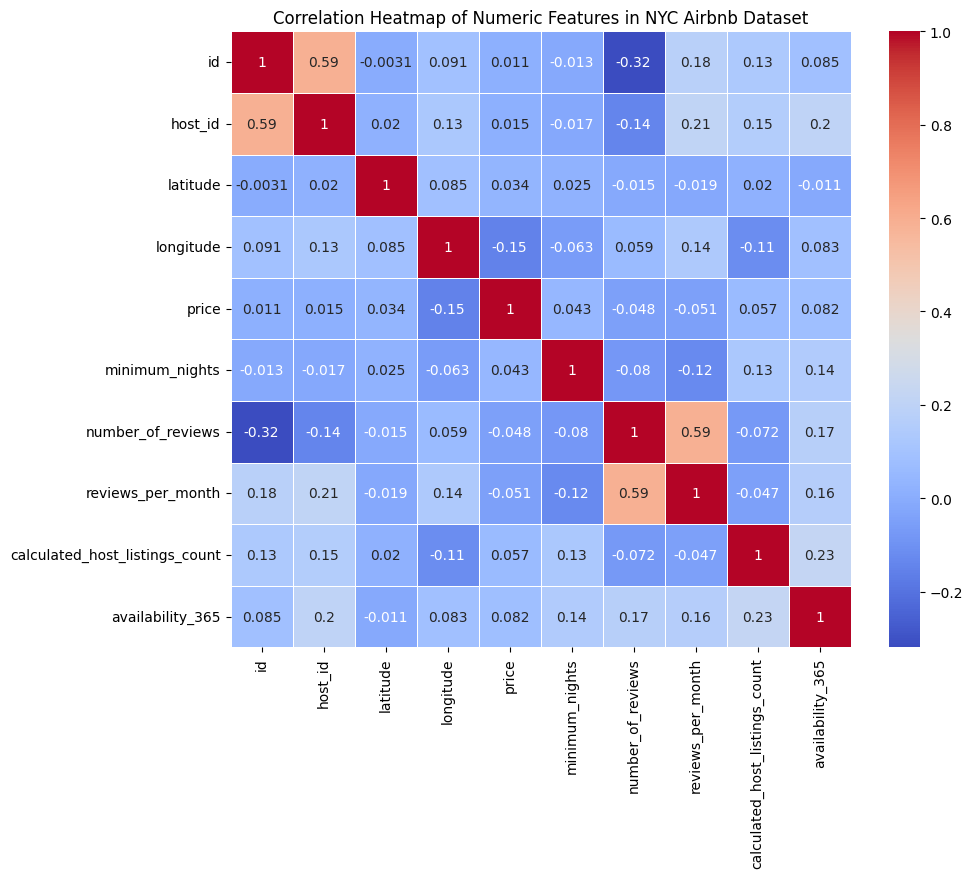

In [ ]:
# Step 3: Generate a correlation heatmap for numeric features in the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix_nyc = nyc_airbnb_df[numeric_columns_nyc].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_nyc, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features in NYC Airbnb Dataset")
plt.show()

Next, I’ll conduct categorical analysis by exploring the distribution of listings across neighbourhood_group and room_type.

The categorical analysis shows the following:
- Neighbourhood Group: The majority of listings are concentrated in Manhattan and Brooklyn, with fewer in Queens, the Bronx, and Staten Island.
- Room Type: Most listings are for “Entire home/apt,” followed by “Private room,” with fewer listings for “Shared room.”

These distributions provide insights into popular areas and room types in NYC for Airbnb.

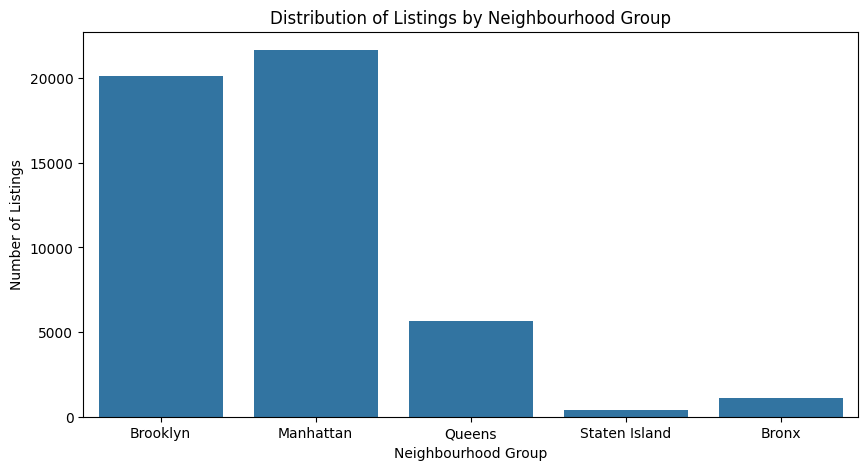

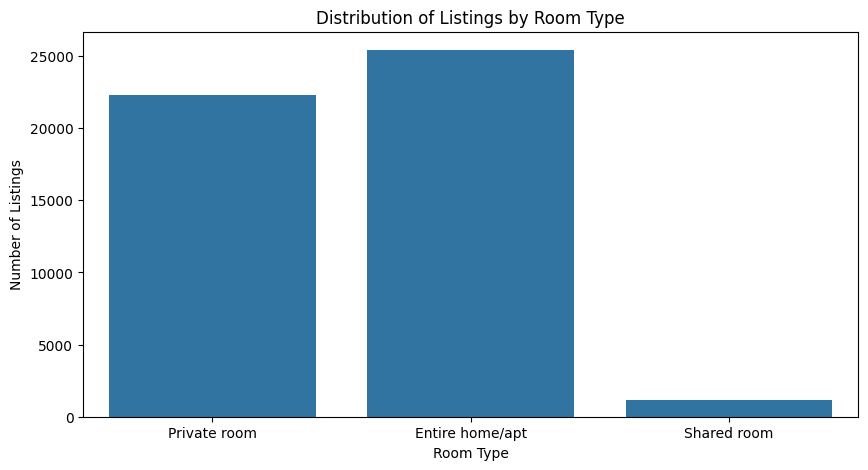

In [ ]:
# Step 4: Categorical analysis for 'neighbourhood_group' and 'room_type'

# Plotting the distribution of listings by neighbourhood group
plt.figure(figsize=(10, 5))
sns.countplot(x='neighbourhood_group', data=nyc_airbnb_df)
plt.title("Distribution of Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

# Plotting the distribution of listings by room type
plt.figure(figsize=(10, 5))
sns.countplot(x='room_type', data=nyc_airbnb_df)
plt.title("Distribution of Listings by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

Next, I’ll conduct a basic geospatial analysis by plotting the locations of listings based on their latitude and longitude

The geospatial plot reveals the distribution of Airbnb listings across New York City:

Manhattan has a dense concentration of listings, especially in central and lower Manhattan.
Brooklyn also has a significant number of listings, particularly in neighborhoods closer to Manhattan.
Queens, the Bronx, and Staten Island have fewer listings, which are more spread out.

This map highlights the primary areas of Airbnb activity, aligning with the popular tourist and residential areas in NYC.

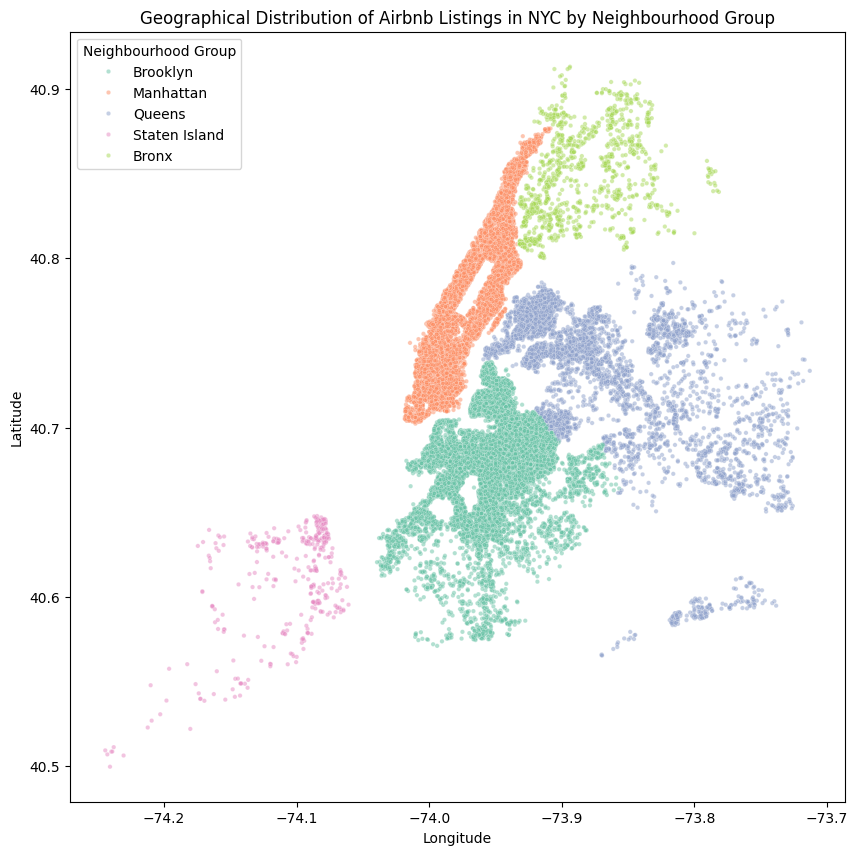

In [ ]:
# Step 5: Geospatial analysis - plot listings by latitude and longitude
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=nyc_airbnb_df, palette="Set2", s=10, alpha=0.5)
plt.title("Geographical Distribution of Airbnb Listings in NYC by Neighbourhood Group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Neighbourhood Group')
plt.show()

### Address questions

#### **What factors influence Airbnb listing prices in NYC, and how can Airbnb provide tailored pricing recommendations based on location, room type, and host characteristics?**

EDA Steps

	1.	Analyze Price Distribution: Examine price to identify outliers and distribution shape.
	2.	Price by Neighbourhood Group: Analyze how prices vary by neighbourhood_group.
	3.	Price by Room Type: Examine price trends across different room types.
	4.	Price vs Host Characteristics:
	•	Calculated Host Listings Count: Investigate if hosts with multiple listings set different price levels.
	5.	Interactions:
	•	Neighbourhood Group & Room Type: Analyze combined influence on prices.
	6.	Regression Analysis: Conduct an initial regression to see how well these features explain price variability.

Let’s start with each of these analyses in sequence.

The histogram shows that most listings are priced below $1,000, with a high concentration at lower prices. This indicates a right-skewed distribution, likely with a few outliers at the higher end.



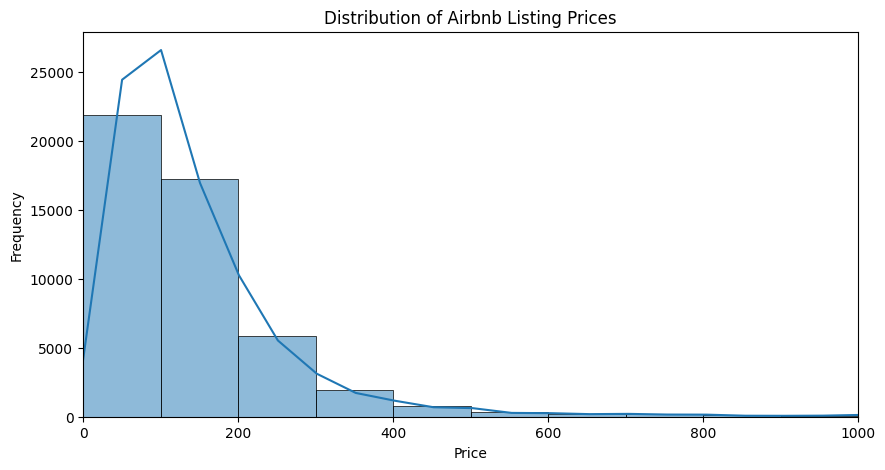

In [ ]:
# Step 1: Analyze Price Distribution

# Plot the distribution of 'price' with a histogram
plt.figure(figsize=(10, 5))
sns.histplot(nyc_airbnb_df['price'], bins=100, kde=True)
plt.xlim(0, 1000)  # Limit x-axis for a clearer view (removes extreme outliers)
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Next, I’ll examine how prices vary across different neighbourhood groups to see if location significantly influences price

The boxplot indicates the following trends:

Manhattan listings generally have the highest median prices, with more variability and outliers at the high end.
Brooklyn follows Manhattan with moderately high prices.
Queens, the Bronx, and Staten Island have lower median prices, with fewer outliers.
This suggests that location (specifically, neighborhood) is a strong factor influencing prices

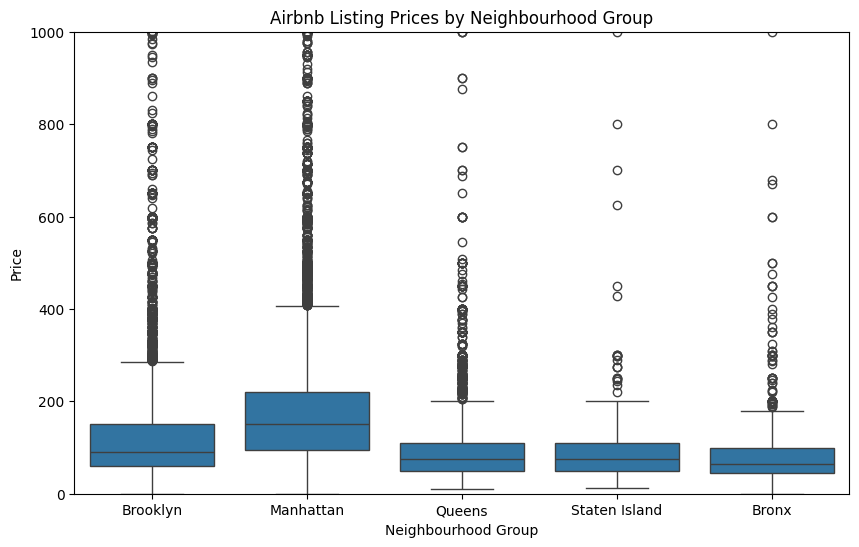

In [ ]:
# Step 2: Price by Neighbourhood Group

# Boxplot to show price distribution by neighbourhood group
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=nyc_airbnb_df)
plt.ylim(0, 1000)  # Limit y-axis for a clearer view (removes extreme outliers)
plt.title("Airbnb Listing Prices by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.show()

Next, I’ll analyze the price distribution by room type to assess if certain types of accommodations are priced higher than others

The boxplot reveals that:
- Entire home/apartment listings have the highest median prices, with a wide range and more high-priced outliers.
- Private rooms are generally priced lower, with less variability than entire homes.
- Shared rooms have the lowest median prices and minimal variability.

This suggests that room type significantly impacts listing prices, with entire homes commanding the highest rates.

The scatter plot suggests that hosts with a larger number of listings generally set lower prices, with most high-priced listings concentrated among hosts with fewer listings. This could indicate that individual or small-scale hosts may price their properties higher, while larger hosts with multiple listings might offer competitive pricing.

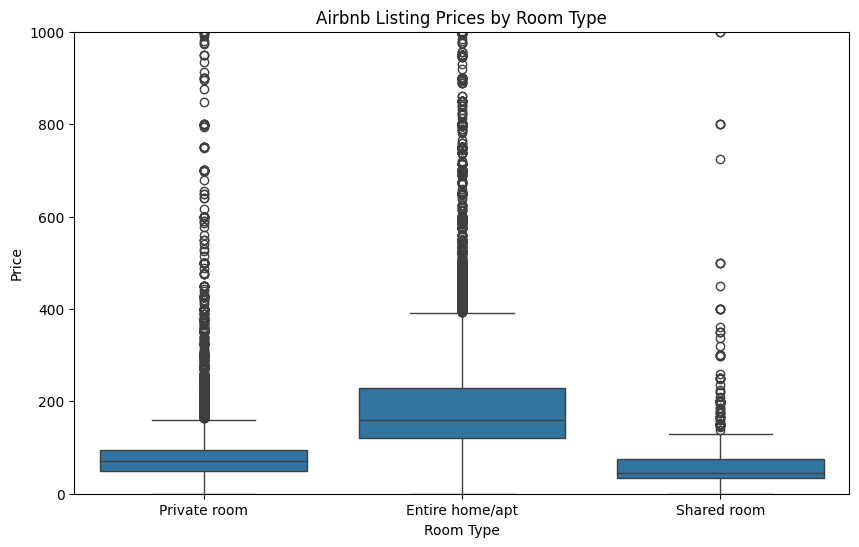

In [ ]:
# Step 3: Price by Room Type

# Boxplot to show price distribution by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=nyc_airbnb_df)
plt.ylim(0, 1000)  # Limit y-axis for a clearer view
plt.title("Airbnb Listing Prices by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

Finally, I’ll examine the interaction between neighbourhood group and room type to see if combining these factors provides additional insights into pricing

The boxplot highlights the combined influence of neighbourhood group and room type on pricing:
- Entire homes/apartments in Manhattan are priced significantly higher compared to other room types and neighborhoods, followed by Brooklyn.
- Private rooms show moderate pricing across neighborhoods, with Manhattan and Brooklyn remaining on the higher end.
- Shared rooms are generally the most affordable across all neighborhoods, with prices varying less between locations.

This interaction analysis reinforces that both neighborhood and room type play substantial roles in determining listing prices.



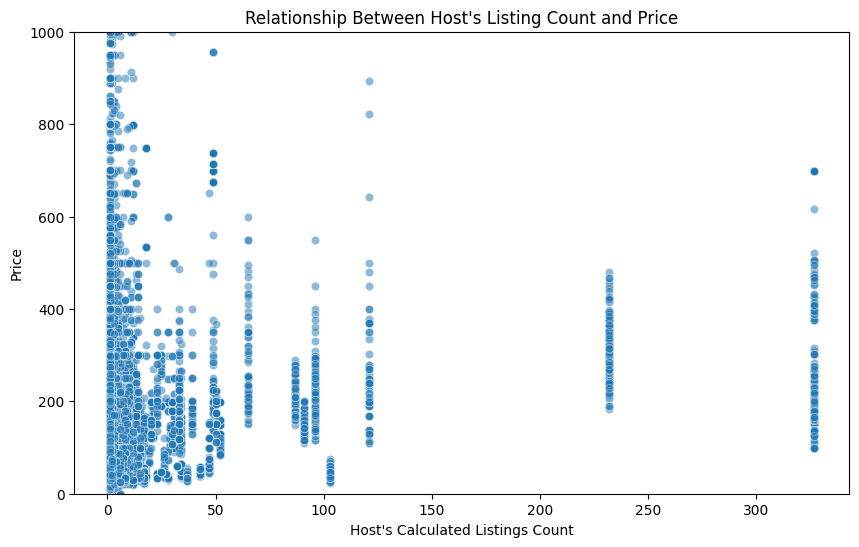

In [ ]:
# Step 4: Price vs Host's Calculated Listings Count

# Scatter plot to examine relationship between price and calculated host listings count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='calculated_host_listings_count', y='price', data=nyc_airbnb_df, alpha=0.5)
plt.ylim(0, 1000)  # Limit y-axis for clearer view
plt.title("Relationship Between Host's Listing Count and Price")
plt.xlabel("Host's Calculated Listings Count")
plt.ylabel("Price")
plt.show()

Summary of Insights for Tailored Pricing Recommendations

- Location: Listings in Manhattan and Brooklyn command higher prices, particularly for entire homes or apartments.
- Room Type: Entire homes/apartments are priced the highest, while private and shared rooms are more affordable options.
- Host Characteristics: Hosts with multiple listings tend to set more competitive, lower prices, likely reflecting a business strategy of volume-based revenue.

With these insights, Airbnb could recommend pricing tiers based on a combination of location, room type, and host listing count, encouraging competitive pricing strategies aligned with the market trends.
